In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch_geometric
import torch_geometric as pyg

In [6]:
ligand = torch.load('./test.pt')
x = ligand['x']
edge_index = ligand['bonds']


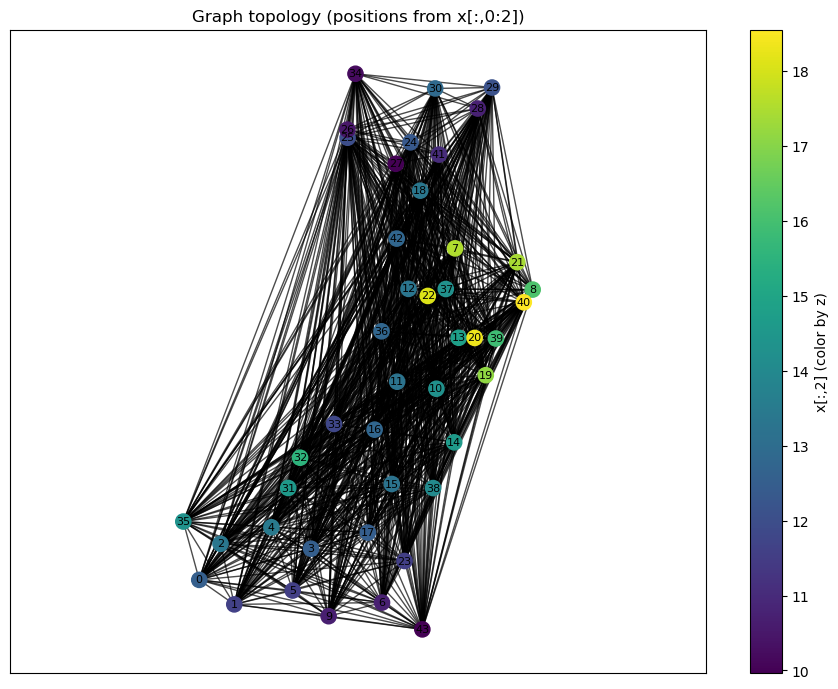

In [7]:
from torch_geometric.utils import to_networkx
import networkx as nx
import numpy as np

# create a PyG Data object and visualize the topology using the node coordinates in `x`
import matplotlib.pyplot as plt

def draw_2d_graph(x, edge_index):
    # build Data and networkx graph (undirected for topology view)
    data = pyg.data.Data(x=x, edge_index=edge_index)
    G = to_networkx(data, to_undirected=True)

    # use the first two columns of x as 2D positions
    pos = {i: (float(x[i, 0]), float(x[i, 1])) for i in range(x.size(0))}

    # color nodes by the third column of x (z)
    z_vals = x[:, 2].cpu().numpy()

    plt.figure(figsize=(9, 7))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=120, node_color=z_vals, cmap="viridis")
    nx.draw_networkx_edges(G, pos, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.colorbar(nodes, label="x[:,2] (color by z)")
    plt.title("Graph topology (positions from x[:,0:2])")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    
draw_2d_graph(x, edge_index)

In [8]:
import nglview as nv
def visualize_3d_graph(x, edge_index):
    """
    使用nglview可视化3D分子结构
    
    参数:
    x: 节点坐标张量 [num_nodes, 3]
    edge_index: 边索引张量 [2, num_edges]
    """
    # 转换为numpy数组
    coords = x.numpy()
    
    # 创建nglview视图
    view = nv.NGLWidget()
    
    # 创建形状组件来添加几何图形
    shape = view.shape
    
    # 添加节点（原子）
    for i, coord in enumerate(coords):
        # 使用shape.add_sphere添加球体表示原子
        shape.add_sphere(list(coord), [1.0, 0.0, 0.0], 0.5)  # 红色球体
    
    # 添加边（化学键）
    edges = edge_index.numpy().T
    for edge in edges:
        start_coord = coords[edge[0]]
        end_coord = coords[edge[1]]
        # 使用shape.add_cylinder添加圆柱体表示化学键
        shape.add_cylinder(list(start_coord), list(end_coord), [0.8, 0.8, 0.8], 0.1)
    
    # 设置视角
    view.camera = 'orthographic'
    view.control.zoom(0.8)
    
    return view

# 加载蛋白质结构
view = visualize_3d_graph(x, edge_index)

pdb_file = 'examples/7RPZ/7RPZ_protein.pdb'
view.add_component(pdb_file)
# 设置蛋白质的显示样式为cartoon
view.add_representation('cartoon', color='grey', opacity=0.7)
# 添加stick显示配体
view.add_representation('licorice', selection='hetero and not water', color='element')
print(f"已加载蛋白质结构: {pdb_file}")

view

已加载蛋白质结构: examples/7RPZ/7RPZ_protein.pdb


NGLWidget()